# PART II 
# 4.  Fuzzy Clustering with Anomalous Patterns

## a) Study the fuzzy c-means (FCM) program in the software package of your choice.  
Apply the program to your dataset at the same hyperparameter c with random seeds. Do this for several 
different values c= c_min, ..., c_max.   Plot the FCM clustering criterion (FCM cost function) in function of 
c. Analyse the graphic and comment if any number of clusters better fits your data than the others. 

In [1]:
import seaborn as sns
sns.set_style("darkgrid")

import pandas as pd

data = pd.read_csv('Data_CC.csv')
data.drop(['CUST_ID'], axis=1, inplace=True)

# Since we have found multiple missing values, we decided to replace them with the mean of the column, since it is the most common method to deal with missing values and therefore should not affect the results of the analysis, being the most conservative approach.
data.fillna(data.mean(), inplace=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

c_min = 2
c_max = 10
random_seeds = range(10)  # Or any range of random seeds you want to try


In [3]:
costs = []
fpc_ar=[]

for c in range(c_min, c_max + 1):
    cluster_costs = []
    for seed in random_seeds:
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data, c, m=2, error=0.005, maxiter=1000, seed=seed)
        
        cluster_costs.append(jm[-1])  # Appending the final cost
    costs.append(np.mean(cluster_costs))  # Taking the average cost across different random seeds
    fpc_ar.append(fpc)



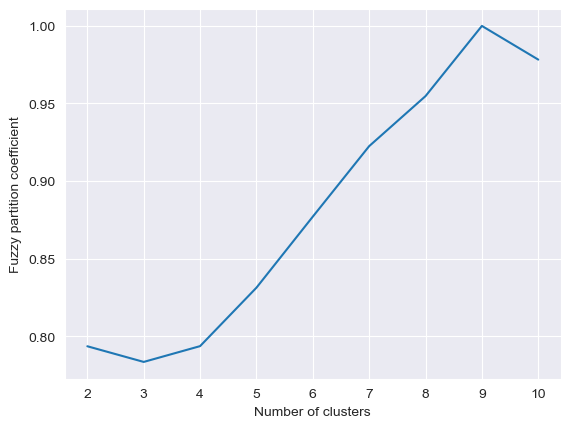

In [8]:
#plot fpc_ar against number of clusters from c_min to c_max
plt.figure()
plt.plot(range(c_min, c_max + 1), fpc_ar)
plt.xlabel("Number of clusters")
plt.ylabel("Fuzzy partition coefficient")
plt.show()


## b) Study the (Iterative) Anomalous Pattern (IAP) clustering algorithm. Test the implementation with the benchmark data sets provided to you.

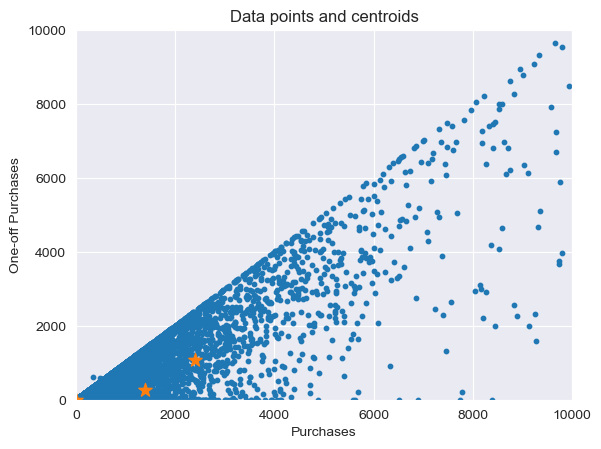

In [6]:
#define the number of clusters
c=3

# Initialize centroids randomly
centroids = data.iloc[np.random.choice(data.shape[0], c, replace=False)]

#plot the centroids with the data, the centroids as stars and the data as circles . Using purchases and one off purcahses
#only the interval of purchases beween 0 and 10000 is shown
plt.scatter(data['PURCHASES'], data['ONEOFF_PURCHASES'], s=10)
plt.scatter(centroids['PURCHASES'], centroids['ONEOFF_PURCHASES'], s=100, marker='*')
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.xlabel('Purchases')
plt.ylabel('One-off Purchases')
plt.title('Data points and centroids')
plt.show()



In [7]:
data_values = data.values  # Convert DataFrame to NumPy array
centroids_values = centroids.values  # Convert DataFrame to NumPy array

for _ in range(20000):
    # Assign each point to the nearest centroid
    labels = np.argmin(np.linalg.norm(data_values[:, np.newaxis] - centroids_values, axis=2), axis=1)
    
    # Update centroids based on the mean of points assigned to each cluster
    for i in range(c):
        centroids_values[i] = np.mean(data_values[labels == i], axis=0)

centroids_values, labels


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import silhouette_score
# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(data, labels)
print(f"Silhouette Score: {silhouette_avg}")

In [ ]:
# Visualize clustering results
plt.scatter(data['PURCHASES'], data['ONEOFF_PURCHASES'], c=labels, s=10)
plt.scatter(centroids['PURCHASES'], centroids['ONEOFF_PURCHASES'], s=100, marker='*')
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.xlabel('Purchases')
plt.ylabel('One-off Purchases')
plt.title('Data points and centroids')
plt.show()


In [ ]:
#plot the centroids with the data, the centroids as stars and the data as circles . but interval purchases from 0 to 4000

plt.scatter(data['PURCHASES'], data['ONEOFF_PURCHASES'], c=labels, s=10)
plt.scatter(centroids['PURCHASES'], centroids['ONEOFF_PURCHASES'], s=100, marker='*')
plt.xlim(0, 4000)
plt.ylim(0, 4000)
plt.xlabel('Purchases')
plt.ylabel('One-off Purchases')
plt.title('Data points and centroids')
plt.show()


## c) Take  the  Anomalous  Clustering  as  the  initialization  algorithm  to  the  fuzzy  c-means  and  apply  the 
Anomalous Patterns_FCM to your data set. Discuss the option taken for setting its stop condition.  Present 
and visualize the found fuzzy partitions of AP-FCM taking advantage of the PCA visualization (check PCA 
tutorial).